In [1]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2)
## &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; $y_t = ϵ_t\sqrt{ω+α_1y^2_{t-1}+α_2y^2_{t-2}+β_1σ^2_{t-1}+β_2σ^2_{t-2}}$ 
### &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; $σ_0 = σ_1=1$ 
### &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; $y_0, y_1 \sim N(0,1)$
### &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; $ϵ_t \sim N(0,1)$

In [2]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]

vols = [1, 1]


for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)
    

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

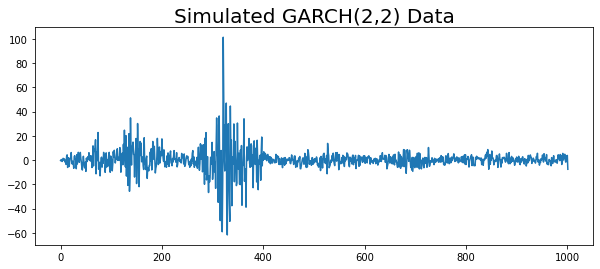

In [3]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

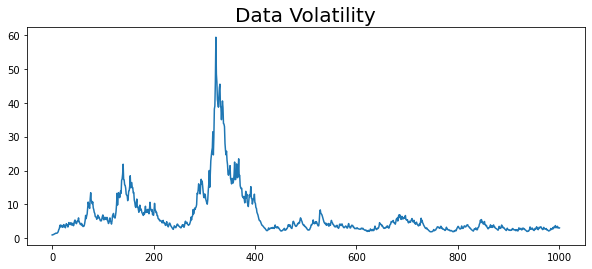

In [4]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

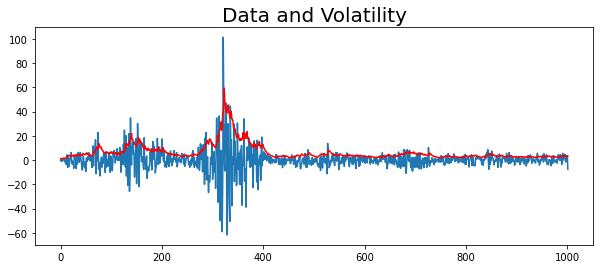

In [5]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot of $y^2_t$

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


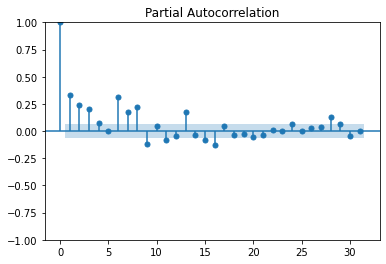

In [6]:
plot_pacf(np.array(series)**2)
plt.show()

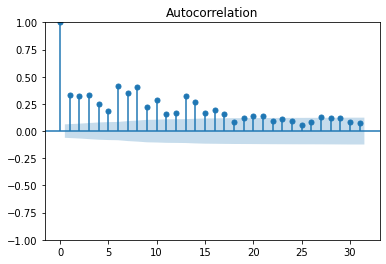

In [7]:
plot_acf(np.array(series)**2)
plt.show()

# Fit the GARCH Model

In [8]:
train, test = series[:-test_size], series[-test_size:]
model = arch_model(train, p=2, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 480396868.30625606
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4363.593672507541
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2926.8153367309665
Iteration:      4,   Func. Count:     32,   Neg. LLF: 2820.9871513707512
Iteration:      5,   Func. Count:     40,   Neg. LLF: 2833.8234832452085
Iteration:      6,   Func. Count:     49,   Neg. LLF: 2921.2833577169285
Iteration:      7,   Func. Count:     57,   Neg. LLF: 2760.198332952883
Iteration:      8,   Func. Count:     64,   Neg. LLF: 2759.3456643826903
Iteration:      9,   Func. Count:     72,   Neg. LLF: 2756.380268422625
Iteration:     10,   Func. Count:     80,   Neg. LLF: 2756.2166638508315
Iteration:     11,   Func. Count:     88,   Neg. LLF: 2756.001343858923
Iteration:     12,   Func. Count:     95,   Neg. LLF: 2755.9722485006664
Iteration:     13,   Func. Count:    102,   Neg. LLF: 2755.963930757798
Iteration:     14,   Func. Count:    109,   Neg. LLF: 27

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2755.96
Distribution:                  Normal   AIC:                           5523.93
Method:            Maximum Likelihood   BIC:                           5552.75
                                        No. Observations:                  902
Date:                Tue, May 02 2023   Df Residuals:                      901
Time:                        10:53:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         1.5742e-03      0.118  1.333e-02      0.989 [ -0.230,  0.233]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.6950      0.233      2.987  2.819e-03    [  0.239,  1.151]
alpha[1]       0.0917  4.047e-02      2.266  2.344e-02  [1.239e-02,  0.171]
alpha[2]       0.2305  6.009e-02      3.836  1.249e-04    [  0.113,  0.348]
beta[1]        0.3286      0.177      1.856  6.352e-02 [-1.849e-02,  0.676]
beta[2]        0.3492      0.142      2.462  1.383e-02  [7.117e-02,  0.627]
===========================================================================

Covariance estimator: robust
"""

In [9]:
predictions = model_fit.forecast(horizon=test_size)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


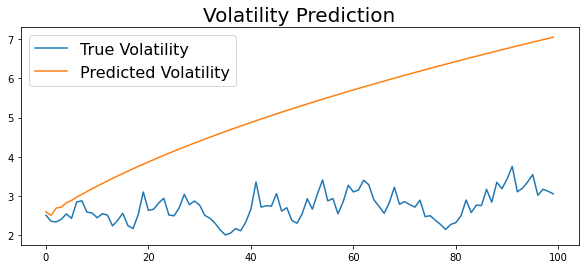

In [10]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [11]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

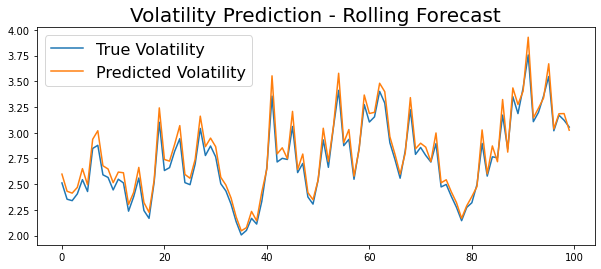

In [12]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)